In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from matplotlib.pyplot import figure
from astropy.io import fits
from astropy.table import Table

from astropy import units as u
from astropy.table import QTable

from Aida_codes.process_rvs import process_spectra

import random

In [22]:
lambdas = np.linspace(846, 870, 2401)

df_stars = pd.read_pickle('data/stars.pkl')

giants = df_stars[(df_stars['logg']>1.5) & (df_stars['logg']<3.5)]
dwarfs = df_stars[df_stars['logg'] > 4]

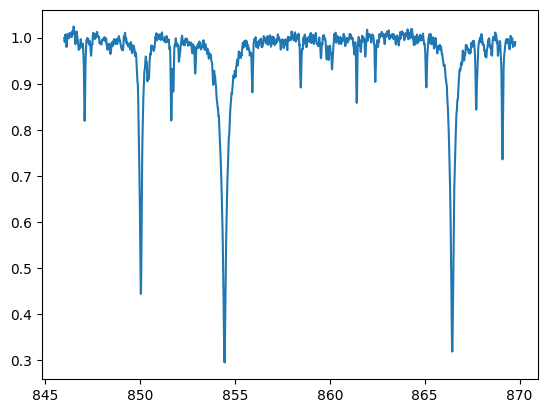

In [23]:
star_example = giants.iloc[0]
plt.plot(lambdas, star_example['flux'])

In [24]:
star_example

flux          [0.9993994, 0.99527884, 0.99053186, 0.99093515...
flux_error    [0.00487193, 0.0047698375, 0.0047632097, 0.005...
source_id                                   2376279549451347328
teff                                                4958.591309
e_teff                                                 8.000588
logg                                                   2.422038
e_logg                                                 0.029418
fe_h                                                  -0.579741
e_fe_h                                                 0.010186
o_h                                                   -0.321001
e_o_h                                                  0.011047
mg_h                                                  -0.428932
e_mg_h                                                 0.012099
si_h                                                   -0.43088
e_si_h                                                 0.011573
Name: 0, dtype: object

In [25]:
wl = lambdas
ca_centers = [850, 854.4, 866.5]
ca1 = np.logical_and(wl > 849.7, wl < 849.9)
ca2 = np.logical_and(wl > 854.1, wl < 854.3)
ca3 = np.logical_and(wl > 866.1, wl < 866.3)
ca_triplet = np.logical_or(np.logical_or(ca1, ca2), ca3)

hw_1 = 0.1 #first half width of mask

Text(0, 0.5, 'normalized flux')

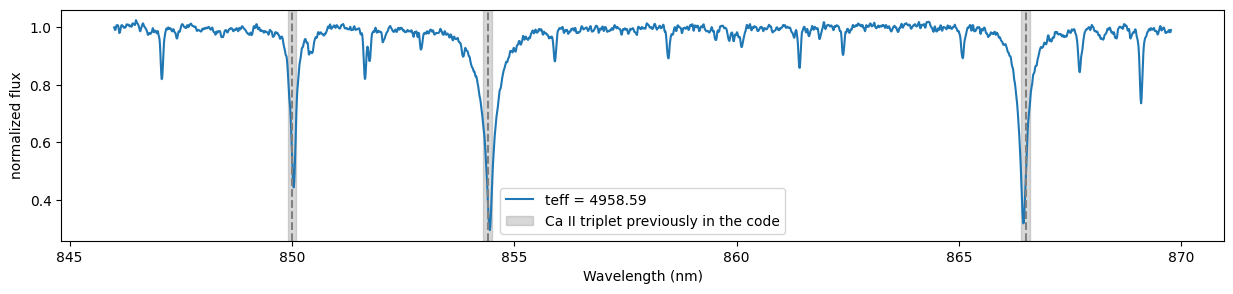

In [26]:
star_example = giants.iloc[0]
processed_star1 = process_spectra(lambdas, star_example['flux'], star_example['flux_error'])

plt.figure(figsize=(15,3))

plt.plot(lambdas, star_example['flux'], label = f'teff = {star_example['teff']:.2f}')

plt.axvline(ca_centers[0], linestyle='--', color = 'gray')
plt.axvline(ca_centers[1], linestyle='--', color = 'gray')
plt.axvline(ca_centers[2], linestyle='--', color = 'gray')
plt.axvspan(ca_centers[0] - hw_1, ca_centers[0] + hw_1, alpha=0.3, color='gray', label='Ca II triplet previously in the code')
plt.axvspan(ca_centers[1] - hw_1, ca_centers[1] + hw_1, alpha=0.3, color='gray')
plt.axvspan(ca_centers[2] - hw_1, ca_centers[2] + hw_1, alpha=0.3, color='gray')

plt.legend()

plt.xlabel('Wavelength (nm)')
plt.ylabel("normalized flux")

Text(0, 0.5, 'normalized flux')

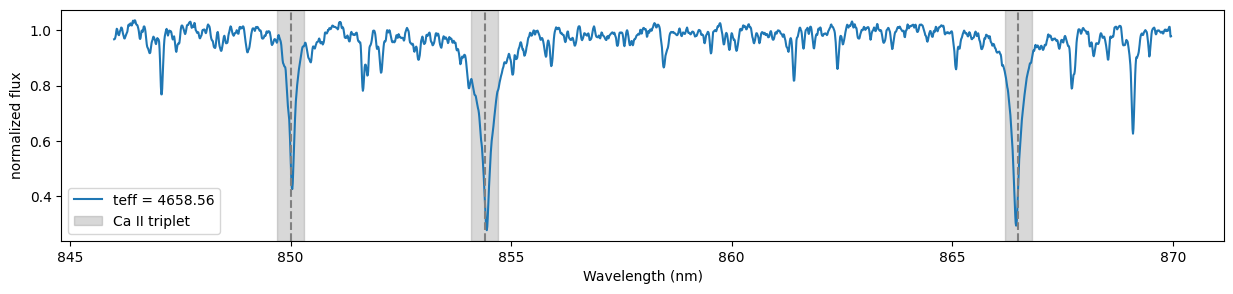

In [27]:
star_example = giants.iloc[20]
hw_2 = 0.3

plt.figure(figsize=(15,3))

plt.plot(lambdas, star_example['flux'], label = f'teff = {star_example['teff']:.2f}')

plt.axvline(ca_centers[0], linestyle='--', color = 'gray')
plt.axvline(ca_centers[1], linestyle='--', color = 'gray')
plt.axvline(ca_centers[2], linestyle='--', color = 'gray')
plt.axvspan(ca_centers[0] - hw_2, ca_centers[0] + hw_2, alpha=0.3, color='gray', label='Ca II triplet')
plt.axvspan(ca_centers[1] - hw_2, ca_centers[1] + hw_2, alpha=0.3, color='gray')
plt.axvspan(ca_centers[2] - hw_2, ca_centers[2] + hw_2, alpha=0.3, color='gray')

plt.legend()

plt.xlabel('Wavelength (nm)')
plt.ylabel("normalized flux")

In [28]:
len(giants)

6586

Text(0, 0.5, 'normalized flux')

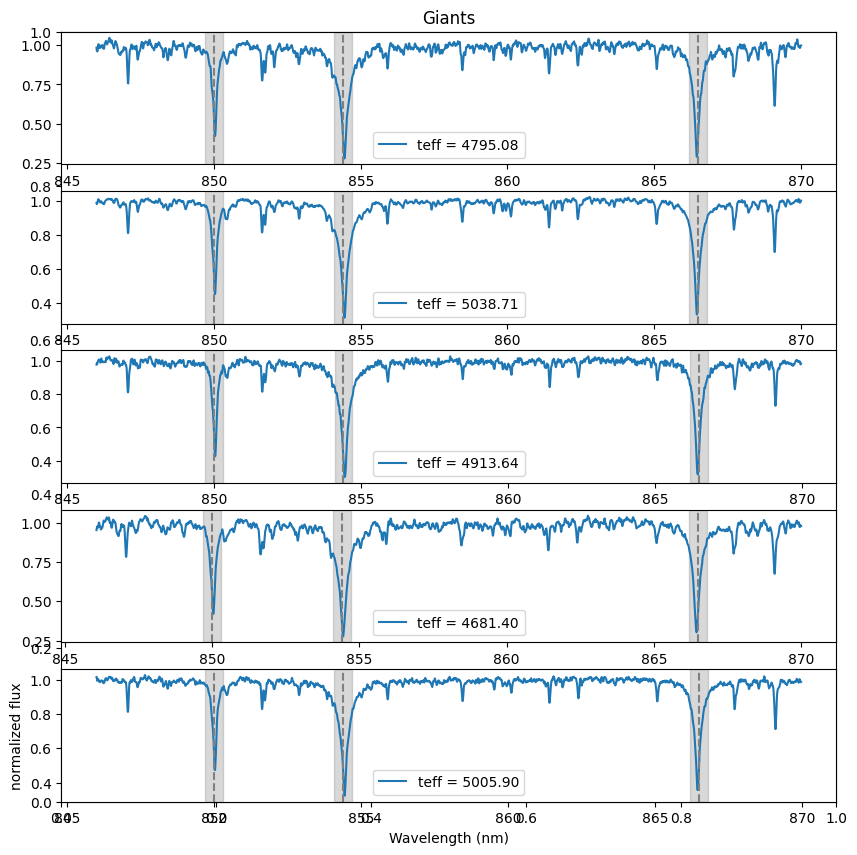

In [29]:
plt.figure(figsize=(10,10))
plt.title('Giants')
for i in range(5):
    plt.subplot(5, 1, i+1)
    star_example = giants.iloc[random.randint(1, len(giants))]
    plt.plot(lambdas, star_example['flux'], label = f'teff = {star_example['teff']:.2f}')
    plt.axvline(ca_centers[0], linestyle='--', color = 'gray')
    plt.axvline(ca_centers[1], linestyle='--', color = 'gray')
    plt.axvline(ca_centers[2], linestyle='--', color = 'gray')
    plt.axvspan(ca_centers[0] - hw_2, ca_centers[0] + hw_2, alpha=0.3, color='gray')
    plt.axvspan(ca_centers[1] - hw_2, ca_centers[1] + hw_2, alpha=0.3, color='gray')
    plt.axvspan(ca_centers[2] - hw_2, ca_centers[2] + hw_2, alpha=0.3, color='gray')
    plt.legend()


plt.legend()

plt.xlabel('Wavelength (nm)')
plt.ylabel("normalized flux")


Text(0, 0.5, 'normalized flux')

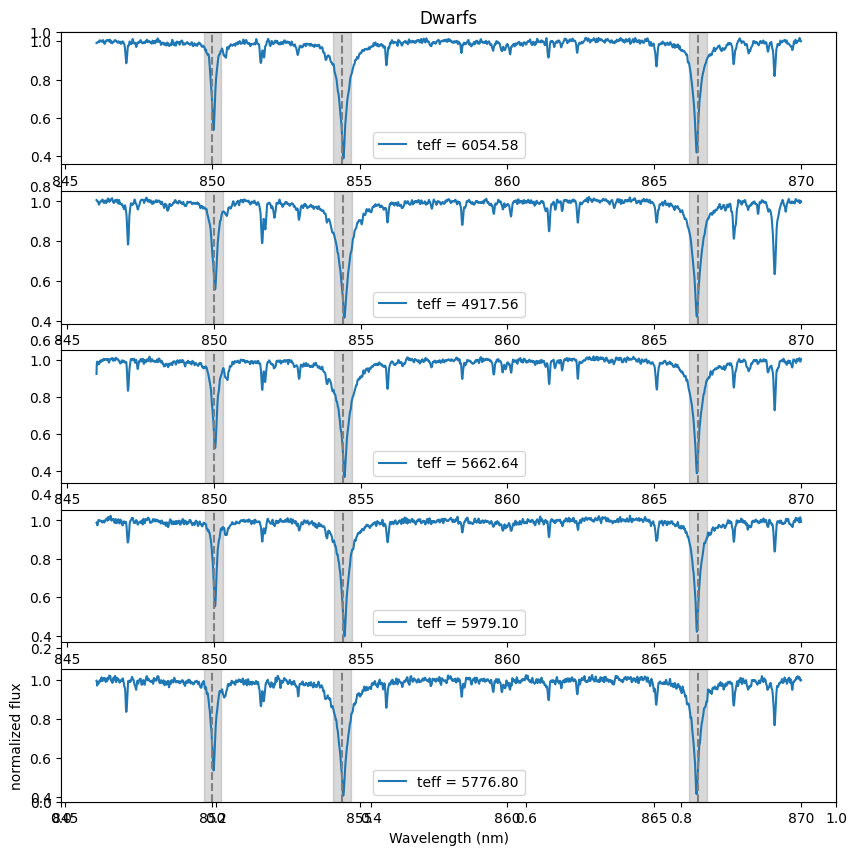

In [30]:
plt.figure(figsize=(10,10))
plt.title("Dwarfs")
for i in range(5):
    plt.subplot(5, 1, i+1)
    star_example = dwarfs.iloc[random.randint(1, len(dwarfs))]
    plt.plot(lambdas, star_example['flux'], label = f'teff = {star_example['teff']:.2f}')
    plt.axvline(ca_centers[0], linestyle='--', color = 'gray')
    plt.axvline(ca_centers[1], linestyle='--', color = 'gray')
    plt.axvline(ca_centers[2], linestyle='--', color = 'gray')
    plt.axvspan(ca_centers[0] - hw_2, ca_centers[0] + hw_2, alpha=0.3, color='gray')
    plt.axvspan(ca_centers[1] - hw_2, ca_centers[1] + hw_2, alpha=0.3, color='gray')
    plt.axvspan(ca_centers[2] - hw_2, ca_centers[2] + hw_2, alpha=0.3, color='gray')
    plt.legend()


plt.legend()

plt.xlabel('Wavelength (nm)')
plt.ylabel("normalized flux")